# Dependencies

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D,Flatten , Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from pandas.io.formats.format import return_docstring
import random

In [ ]:
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
nltk.download("punkt")
nltk.download("wordnet")

# Q1


**Design a intent file on below data**



What is artificial intelligence?	Artificial intelligence is a branch of computer science that aims to create intelligent machines capable of performing tasks that typically require human intelligence.
How does machine learning work?	Machine learning is a subset of AI that provides systems the ability to automatically learn and improve from experience without being explicitly programmed.
Explain the concept of deep learning.	Deep learning is a type of machine learning that involves neural networks with many layers (deep neural networks). It is particularly effective for tasks such as image and speech recognition.
What are neural networks?	Neural networks are computational models inspired by the structure and functioning of the human brain. They consist of interconnected nodes (neurons) that process information.
How is natural language processing used in AI?	Natural language processing (NLP) involves the interaction between computers and humans using natural language. It enables machines to understand, interpret, and generate human-like text.
What is the difference between supervised and unsupervised learning?	In supervised learning, the algorithm is trained on a labeled dataset, while unsupervised learning involves training on an unlabeled dataset, letting the algorithm find patterns on its own.
Can you provide examples of AI applications in real life?	AI has applications in various fields, including healthcare (diagnosis and treatment planning), finance (fraud detection), autonomous vehicles, virtual assistants, and more.
What are the ethical considerations in AI development?	Ethical considerations in AI development include issues related to bias in algorithms, transparency, accountability, job displacement, and the impact on privacy.
How does reinforcement learning work?	Reinforcement learning involves an agent learning through trial and error. It receives feedback in the form of rewards or penalties based on its actions in an environment.
What is computer vision?	Computer vision enables machines to interpret and make decisions based on visual data. It is used in image and video analysis, facial recognition, object detection, and more.
Explain the Turing test.	The Turing test is a measure of a machine's ability to exhibit intelligent behavior equivalent to or indistinguishable from that of a human. It assesses natural language conversation.
What are the challenges in developing strong AI?	Challenges in developing strong AI include achieving common sense reasoning, understanding context, ethical concerns, and addressing potential risks and biases in AI systems.
How is AI leveraged in the field of agriculture for precision farming?	AI is utilized in agriculture for precision farming through applications like crop monitoring, automated harvesting, and optimizing resource utilization for sustainable and efficient farming practices.
In what ways does AI contribute to the cybersecurity landscape?	AI enhances cybersecurity by identifying and responding to threats in real-time, predicting potential vulnerabilities, and improving overall resilience against cyber attacks.
Can AI assist in drug discovery and development in the pharmaceutical industry?	AI accelerates drug discovery by analyzing biological data, predicting potential drug candidates, and streamlining the process of bringing new pharmaceuticals to market.
What ethical considerations arise with the use of AI in criminal justice systems?	The use of AI in criminal justice raises ethical concerns related to bias, transparency, and fairness, prompting discussions on responsible and unbiased deployment of AI technologies.
How does AI impact environmental sustainability efforts?	AI contributes to environmental sustainability by optimizing resource management, monitoring pollution levels, and facilitating data-driven decision-making for sustainable development.
In what ways can AI be applied to enhance customer experience in various industries?	AI improves customer experience through personalized recommendations, chatbots for customer support, and predictive analytics to understand and meet customer preferences.
What challenges and opportunities does AI present in the realm of space exploration?	AI presents challenges and opportunities in space exploration by aiding in autonomous spacecraft navigation, data analysis, and the development of intelligent robotic systems for space missions.
What is the role of AI in augmenting human capabilities in the workplace?	AI augments human capabilities in the workplace by automating routine tasks, providing data-driven insights, and facilitating collaboration between humans and intelligent systems.
Can AI be used to address societal challenges such as poverty and inequality?	AI has the potential to address societal challenges by supporting data-driven decision-making in areas like poverty alleviation, healthcare accessibility, and education opportunities.
How can AI contribute to language translation and cross-cultural communication?	AI enhances language translation by employing natural language processing techniques, enabling more accurate and efficient cross-cultural communication in diverse global contexts.


In [ ]:
with open("Text.txt") as f:
  text = f.read()

questions= []
responses = []
for line in text.split('\t'):
  for y in line.split('\n'):
    if '?' in y:
      questions.append(y)
    else:
      if len(y) > 0:
        responses.append(y)

questions

['What is artificial intelligence?',
 'How does machine learning work?',
 'What are neural networks?',
 'How is natural language processing used in AI?',
 'What is the difference between supervised and unsupervised learning?',
 'Can you provide examples of AI applications in real life?',
 'What are the ethical considerations in AI development?',
 'How does reinforcement learning work?',
 'What is computer vision?',
 'What are the challenges in developing strong AI?',
 'How is AI leveraged in the field of agriculture for precision farming?',
 'In what ways does AI contribute to the cybersecurity landscape?',
 'Can AI assist in drug discovery and development in the pharmaceutical industry?',
 'What ethical considerations arise with the use of AI in criminal justice systems?',
 'How does AI impact environmental sustainability efforts?',
 'In what ways can AI be applied to enhance customer experience in various industries?',
 'What challenges and opportunities does AI present in the realm 

In [ ]:
responses

['Artificial intelligence is a branch of computer science that aims to create intelligent machines capable of performing tasks that typically require human intelligence.',
 'Machine learning is a subset of AI that provides systems the ability to automatically learn and improve from experience without being explicitly programmed.',
 'Explain the concept of deep learning.',
 'Deep learning is a type of machine learning that involves neural networks with many layers (deep neural networks). It is particularly effective for tasks such as image and speech recognition.',
 'Neural networks are computational models inspired by the structure and functioning of the human brain. They consist of interconnected nodes (neurons) that process information.',
 'Natural language processing (NLP) involves the interaction between computers and humans using natural language. It enables machines to understand, interpret, and generate human-like text.',
 'In supervised learning, the algorithm is trained on a l

In [ ]:
new_intent = {"tag":"AI", "patterns" : questions , "responses" : responses}
new_intent

{'tag': 'AI',
 'patterns': ['What is artificial intelligence?',
  'How does machine learning work?',
  'What are neural networks?',
  'How is natural language processing used in AI?',
  'What is the difference between supervised and unsupervised learning?',
  'Can you provide examples of AI applications in real life?',
  'What are the ethical considerations in AI development?',
  'How does reinforcement learning work?',
  'What is computer vision?',
  'What are the challenges in developing strong AI?',
  'How is AI leveraged in the field of agriculture for precision farming?',
  'In what ways does AI contribute to the cybersecurity landscape?',
  'Can AI assist in drug discovery and development in the pharmaceutical industry?',
  'What ethical considerations arise with the use of AI in criminal justice systems?',
  'How does AI impact environmental sustainability efforts?',
  'In what ways can AI be applied to enhance customer experience in various industries?',
  'What challenges and 

In [ ]:
intents_data = {

  "intents": [
        {
            "tag": "greeting",
            "patterns": ["Hi there", "How are you", "Is anyone there?", "Hey", "Hola", "Hello", "Good day"],
            "responses": ["Hello", "Good to see you again", "Hi there, how can I help?"],
         },
        {
            "tag": "goodbye",
            "patterns": ["Bye", "See you later", "Goodbye", "Nice chatting to you, bye", "Till next time"],
            "responses": ["See you!", "Have a nice day", "Bye! Come back again soon."],
         },
        {
            "tag": "thanks",
            "patterns": ["Thanks", "Thank you", "That's helpful", "Awesome, thanks", "Thanks for helping me"],
            "responses": ["My pleasure", "You're Welcome"],
         }, {
            "tag": "personalized_healthcare",
            "responses": ["AI in personalized healthcare involves analyzing individual patient data to tailor treatment plans.", "It uses machine learning to customize medical approaches based on patient information."]
        },
        {
            "tag": "autonomous_vehicles",
            "responses": ["AI plays a crucial role in autonomous vehicles by enabling perception, decision-making, and safe navigation.", "It utilizes machine learning algorithms and computer vision systems for self-driving capabilities."]
        },
        {
            "tag": "creative_ai",
            "responses": ["Yes, AI can be used for creative purposes through generative models.", "It can create art, compose music, and even write stories based on learned patterns."]
        },
        {
            "tag": "ai_risks",
            "responses": ["Potential risks of widespread AI adoption include job displacement, ethical concerns, biases, security vulnerabilities, and misuse of AI technologies.", "Careful consideration is essential to mitigate these risks."]
        },
        {
            "tag": "ai_education",
            "responses": ["AI in education aids in personalized learning, automated grading, and adaptive educational systems.", "It identifies student learning patterns and provides targeted interventions."]
        },
  ]
}

intents_data["intents"].append(new_intent)
new_intents = {"intents" : []}

for dictt in intents_data["intents"]:
  if 'patterns' not in dictt.keys():
    dictt["patterns"] = []
  new_intents["intents"].append(dictt)

with open('content.json', 'w') as file:
    json.dump(new_intents, file, indent=4)

print("intents.json has been created.")

intents.json has been created.


# Q2


**Convert the .json file to an appropriate dataframe**

In [ ]:
#import the data
with open('content.json') as content:
  data = json.load(content)

with open('content_mod.json', 'w') as file:
    json.dump(intents_data['intents'], file, indent=4)

df = pd.read_json("content_mod.json")
df

,tag,patterns,responses
0,greeting,"[Hi there, How are you, Is anyone there?, Hey,...","[Hello, Good to see you again, Hi there, how c..."
1,goodbye,"[Bye, See you later, Goodbye, Nice chatting to...","[See you!, Have a nice day, Bye! Come back aga..."
2,thanks,"[Thanks, Thank you, That's helpful, Awesome, t...","[My pleasure, You're Welcome]"
3,personalized_healthcare,[],[AI in personalized healthcare involves analyz...
4,autonomous_vehicles,[],[AI plays a crucial role in autonomous vehicle...
5,creative_ai,[],"[Yes, AI can be used for creative purposes thr..."
6,ai_risks,[],[Potential risks of widespread AI adoption inc...
7,ai_education,[],[AI in education aids in personalized learning...
8,AI,"[What is artificial intelligence?, How does ma...",[Artificial intelligence is a branch of comput...


# Q3


## Part A

**Can you provide a histogram visualization representing the distribution of question lengths in the dataset?**

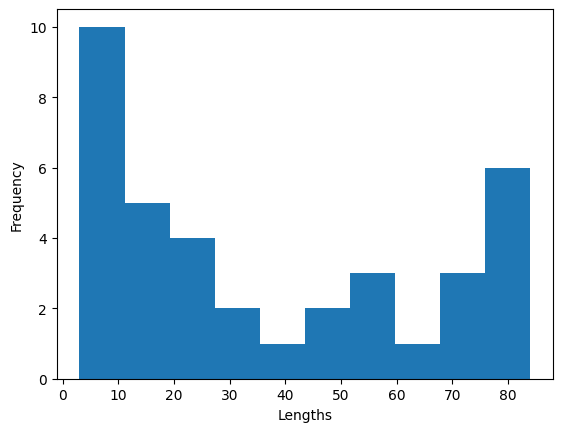

In [ ]:
X = []
total_lens = []
Y = []
tags = df["tag"]


words = []

for index , questions in enumerate(df["patterns"]):
  if questions is not float():
    if len(questions)>0 :
      lengths = []
      indexes = []
      for question in questions:
          lengths.append(len(question))
          total_lens.append(len(question))
          indexes.append(tags[index])



    X.append(lengths)
    Y.append(indexes)


plt.hist(total_lens)
plt.xlabel("Lengths")
plt.ylabel("Frequency")

plt.show()

## Part B

**Share a bar chart that displays the top 10 most frequent words in the questions.**

<BarContainer object of 10 artists>

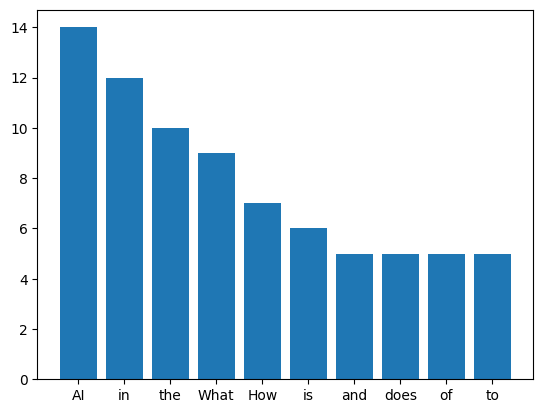

In [ ]:
words = {}
all_words = []
for listed in df["patterns"]:
  for question in listed:
        for i in question.split():
          if '?' in i:
            all_words.append(i[:-1])
          else:
            all_words.append(i)

all_words = sorted(all_words)

for word in all_words:
  if word not in words.keys():
    words[word] = 1
  else:
    words[word] += 1

valsorted = sorted(words.values(),reverse=True)
mostfreq  = valsorted[:10]
freq_words = []
for freq in mostfreq:
  for key in words.keys():
    if words[key] == freq:
      freq_words.append(key)
    if len(freq_words) > 10:
      break


plt.bar(freq_words[:10] , mostfreq)

#**Q4**
**Clean the data and prepare it**

In [ ]:
# what's   your   name?   --> what is your name
intents = new_intents
words = []
documents = []
classes = []
classes = set (df['tag'])

ignore = ["?", "!"]

for intent in intents["intents"]:
    for pattern in intent["patterns"]:
        w = nltk.word_tokenize(pattern)
        if w not in ignore:
          words.extend(w)
          documents.append((w, intent["tag"]))



words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore]
words = sorted(list(set(words)))
classes = sorted(list(set(classes)))
print(len(documents), "documents")
print(len(classes), "classes", classes)
print(documents)

37 documents
9 classes ['AI', 'ai_education', 'ai_risks', 'autonomous_vehicles', 'creative_ai', 'goodbye', 'greeting', 'personalized_healthcare', 'thanks']
[(['Hi', 'there'], 'greeting'), (['How', 'are', 'you'], 'greeting'), (['Is', 'anyone', 'there', '?'], 'greeting'), (['Hey'], 'greeting'), (['Hola'], 'greeting'), (['Hello'], 'greeting'), (['Good', 'day'], 'greeting'), (['Bye'], 'goodbye'), (['See', 'you', 'later'], 'goodbye'), (['Goodbye'], 'goodbye'), (['Nice', 'chatting', 'to', 'you', ',', 'bye'], 'goodbye'), (['Till', 'next', 'time'], 'goodbye'), (['Thanks'], 'thanks'), (['Thank', 'you'], 'thanks'), (['That', "'s", 'helpful'], 'thanks'), (['Awesome', ',', 'thanks'], 'thanks'), (['Thanks', 'for', 'helping', 'me'], 'thanks'), (['What', 'is', 'artificial', 'intelligence', '?'], 'AI'), (['How', 'does', 'machine', 'learning', 'work', '?'], 'AI'), (['What', 'are', 'neural', 'networks', '?'], 'AI'), (['How', 'is', 'natural', 'language', 'processing', 'used', 'in', 'AI', '?'], 'AI'), (['

# Q5

## Part A

**Tokenize the Data**

In [ ]:
tokenized = []
out = [0] * len(classes)
for doc in documents:
    bag = []
    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    output = list(out)
    output[classes.index(doc[1])] = 1
    tokenized.append([bag, output])


print(tokenized)
random.shuffle(tokenized)

[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:

y = [item[0] for item in tokenized]
y = [item[1] for item in tokenized]
x = np.array(x)
y = np.array(y)


In [ ]:
y[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0])

Epoch 1/200


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_6' (type Sequential).
    
    Input 0 of layer "lstm_5" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 118)
    
    Call arguments received by layer 'sequential_6' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 118), dtype=int64)
      • training=True
      • mask=None


## Part B

**Validate**

In [ ]:
total_len = len(x)

#dividing to train and test sets 20% split:
trainset_x = x[:int(len(x) - len(x)/8)]
trainset_y = y[:int(len(y) - len(y)/8)]
testset_x = x[len(trainset_x):]
testset_y = y[len(trainset_y):]

print(len(trainset_x),len(trainset_y),len(testset_x),len(testset_y))

32 32 5 5


## Part C

**Do Label Encoding on Data**

In [ ]:
# already done in bow

## Part D

**Create The Model based on LSTM architecture**

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(128, input_shape=(len(x[0]),), activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(len(y[0]), activation="softmax"))

# Q6

## Part A

**Compile The Data**

In [ ]:

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])


## Part B

**Train The Data**

In [ ]:
log = model.fit(np.array(x), np.array(y), epochs=200, batch_size=5, verbose=1)
model.save("chatcraft.h5", log)

Epoch 1/200
8/8 [==============================] - 1s 3ms/step - loss: 2.1125 - accuracy: 0.4595
Epoch 2/200
8/8 [==============================] - 0s 3ms/step - loss: 1.7672 - accuracy: 0.5405
Epoch 3/200
8/8 [==============================] - 0s 3ms/step - loss: 1.4402 - accuracy: 0.5405
Epoch 4/200
8/8 [==============================] - 0s 3ms/step - loss: 1.3138 - accuracy: 0.5405
Epoch 5/200
8/8 [==============================] - 0s 3ms/step - loss: 1.1441 - accuracy: 0.5405
Epoch 6/200
8/8 [==============================] - 0s 3ms/step - loss: 1.0484 - accuracy: 0.6216
Epoch 7/200
8/8 [==============================] - 0s 3ms/step - loss: 0.9346 - accuracy: 0.5946
Epoch 8/200
8/8 [==============================] - 0s 3ms/step - loss: 0.7953 - accuracy: 0.6757
Epoch 9/200
8/8 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.8108
Epoch 10/200
8/8 [==============================] - 0s 3ms/step - loss: 0.5845 - accuracy: 0.7838
Epoch 11/200
8/8 [===========

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Q7

**Inference Function**

**your model should react ' this type of conversation is not allowed' for slang words such as words like Damn or Dude and more**

**Your model should provide output regarding Artificial Intelligence**

In [ ]:
import random

while True:
  texts_p=[]
  prediction_input = input("you: ")

  #removing punctuation
  punctuation_removed = ""
  for char in prediction_input:
    if char not in [',','.','!',"(",")"]
        punctuation_removed = punctuation_removed + char
  #tokenization and padding


  #finding the right tag
  if response_tag == 'goodbye':
    break